<a href="https://colab.research.google.com/github/nhquynhhh/IS403_O21_2/blob/week7_hoangmanhthang/Model/RNN/KDH_RNN_7_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [141]:
# 1. Import thư viện cần thiết
# from google.colab import drive
# drive.mount('/content/drive')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

In [142]:
# 2. Đọc file csv
df = pd.read_csv('KDH-Data.csv')
df

,Date,Price
0,2017-01-03,9198.4
1,2017-01-04,9198.4
2,2017-01-05,8944.8
3,2017-01-06,9083.2
4,2017-01-07,9106.2
...,...,...
2702,2024-05-28,36250.0
2703,2024-05-29,35700.0
2704,2024-05-30,36050.0
2705,2024-05-31,36200.0


In [143]:
df1=df.reset_index()['Price']

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2707 entries, 0 to 2706
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2707 non-null   object 
 1   Price   2707 non-null   float64
dtypes: float64(1), object(1)
memory usage: 42.4+ KB


In [145]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [146]:
# 4. Chia train test
train_size = int(0.7 * len(df1))
test_size = int(0.3 * len(df1))

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]

In [147]:
test_data

array([[0.896091  ],
       [0.896091  ],
       [0.85945581],
       [0.85521606],
       [0.86798216],
       [0.88501143],
       [0.87650851],
       [0.86883479],
       [0.86883479],
       [0.92548816],
       [0.91483022],
       [0.9190934 ],
       [0.92122498],
       [0.8223053 ],
       [0.90058841],
       [0.90058841],
       [0.81455195],
       [0.82422607],
       [0.80874279],
       [0.81260775],
       [0.82811446],
       [0.8176486 ],
       [0.8176486 ],
       [0.81260775],
       [0.79712447],
       [0.77777622],
       [0.77969699],
       [0.77583202],
       [0.78860749],
       [0.78860749],
       [0.75986269],
       [0.76034874],
       [0.77002286],
       [0.76034874],
       [0.74873042],
       [0.75986269],
       [0.75986269],
       [0.74486545],
       [0.76034874],
       [0.75648377],
       [0.71968462],
       [0.73905629],
       [0.74408777],
       [0.74408777],
       [0.68098812],
       [0.69937598],
       [0.70033637],
       [0.700

In [148]:
# 5. Hàm Create Dataset
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, X=0,1,2,3-----99   Y=100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [149]:
#6. Reshape into X=t,t+1,t+2..t+99 and Y=t+100

time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
# X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [150]:
# 7. Reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [151]:
# 8. Define LSTM Model

model = Sequential()
model.add(SimpleRNN(50, input_shape=(time_step, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [152]:
# 9. Fit mô hình với dữ liệu train
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
29/29 [==============================] - 3s 33ms/step - loss: 0.0087 - val_loss: 7.8072e-04
Epoch 2/100
29/29 [==============================] - 1s 23ms/step - loss: 7.2600e-04 - val_loss: 6.5922e-04
Epoch 3/100
29/29 [==============================] - 1s 22ms/step - loss: 3.5089e-04 - val_loss: 6.0009e-04
Epoch 4/100
29/29 [==============================] - 1s 22ms/step - loss: 3.3297e-04 - val_loss: 6.6251e-04
Epoch 5/100
29/29 [==============================] - 1s 24ms/step - loss: 2.9877e-04 - val_loss: 5.3366e-04
Epoch 6/100
29/29 [==============================] - 1s 23ms/step - loss: 2.8422e-04 - val_loss: 4.9369e-04
Epoch 7/100
29/29 [==============================] - 1s 22ms/step - loss: 2.6768e-04 - val_loss: 4.4174e-04
Epoch 8/100
29/29 [==============================] - 1s 22ms/step - loss: 2.7442e-04 - val_loss: 8.6219e-04
Epoch 9/100
29/29 [==============================] - 1s 23ms/step - loss: 3.1781e-04 - val_loss: 0.0053
Epoch 10/100
29/29 [================

In [153]:
# 10. Dự báo dữ liệu test
train_predict=model.predict(X_train)
y_pred=model.predict(X_test)

23/23 [==============================] - 0s 7ms/step


In [154]:
# 11. Chuẩn hóa dữ liệu y_pred
train_predict=scaler.inverse_transform(train_predict)
y_pred=scaler.inverse_transform(y_pred)

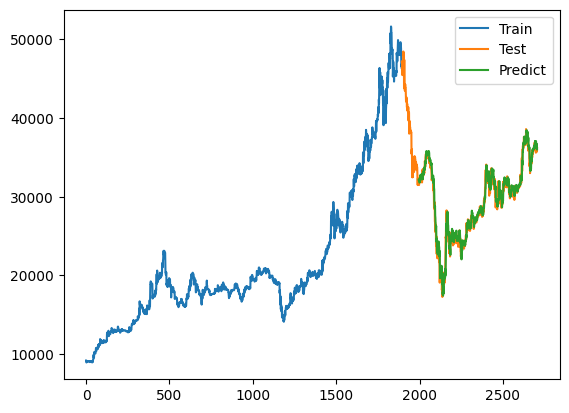

In [155]:
# 14.Vẽ hình

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
plt.legend(['Train','Test','Predict'])
plt.show()

In [156]:
ytest = scaler.inverse_transform(ytest.reshape(-1, 1))

In [157]:
# prompt: print RMSE, MAPE, MAE using lib

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(ytest, y_pred))
print("RMSE:", rmse)


# Calculate MAE
mae = mean_absolute_error(ytest, y_pred)
print("MAE:", mae)

# Calculate MAPE
mape = mean_absolute_percentage_error(ytest, y_pred)
print("MAPE:", mape)


RMSE: 675.1599078551329
MAE: 490.179834556669
MAPE: 0.01755343078652345


In [158]:
predictions_30 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(30):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_30.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 23ms/step


In [159]:
predictions_60 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(60):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_60.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 35ms/step


In [160]:
predictions_90 = []
input_data = X_test[-20]  # Lấy dữ liệu cuối cùng từ X_test
for i in range(90):  # Thực hiện dự đoán liên tiếp 60 lần
    prediction = model.predict(input_data.reshape(1, time_step, 1))
    predictions_90.append(prediction[0])
    input_data = np.append(input_data[1:], prediction[0])  # Cập nhật dữ liệu đầu vào cho lần dự đoán tiếp theo


1/1 [==============================] - 0s 26ms/step


In [161]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred30

array([[36338.66793079],
       [36543.42630558],
       [36710.99798641],
       [36970.42187004],
       [37038.96304893],
       [37192.67432728],
       [37467.98156548],
       [37768.77291069],
       [37869.60752964],
       [37898.72022743],
       [38192.03810062],
       [38464.14169521],
       [38603.26481724],
       [38746.05724354],
       [38965.0093626 ],
       [39187.00481586],
       [39253.17952251],
       [39542.52528477],
       [39837.98061676],
       [39981.16491051],
       [40175.18001022],
       [40272.1392128 ],
       [40534.35451584],
       [40703.86517715],
       [40809.53961353],
       [40905.72525959],
       [41135.2654335 ],
       [41262.28392277],
       [41378.07057495],
       [41515.03588142]])

In [162]:
y_pred30=scaler.inverse_transform(predictions_30)
y_pred60=scaler.inverse_transform(predictions_60)

y_pred90=scaler.inverse_transform(predictions_90)


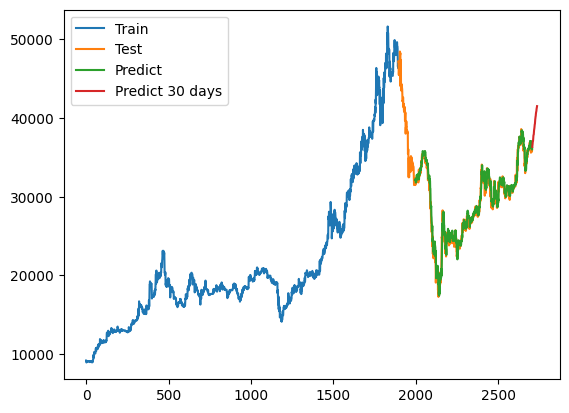

In [163]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_30_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+30, step=1)
plt.plot(predict_30_days,(y_pred30))
plt.legend(['Train','Test','Predict', 'Predict 30 days'])
plt.show()



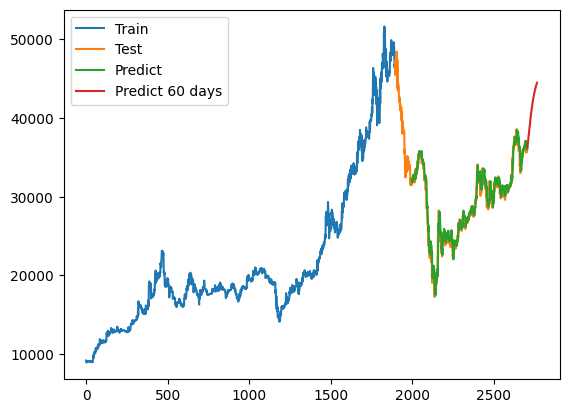

In [164]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_60_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+60, step=1)
plt.plot(predict_60_days,(y_pred60))
plt.legend(['Train','Test','Predict','Predict 60 days',])
plt.show()



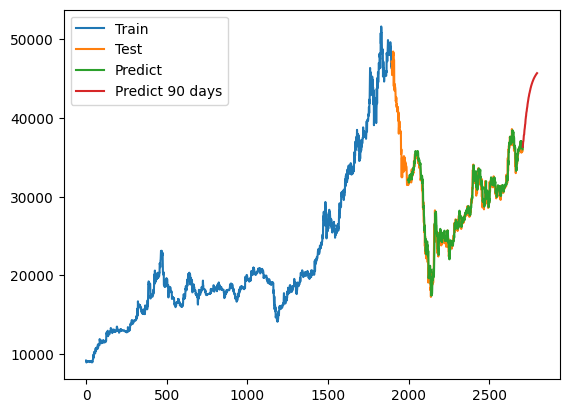

In [165]:
# Tính toán chỉ số của dữ liệu dự đoán cho 30, 60 và 90 ngày tiếp theo

train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+101, stop=train_size+test_size, step=1)
plt.plot(test_data_index,(y_pred))
predict_90_days = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+90, step=1)
plt.plot(predict_90_days,(y_pred90))
plt.legend(['Train','Test','Predict', 'Predict 90 days'])
plt.show()

